In [1]:
import os
from pathlib import Path
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
os.getcwd()

'/Users/upar/Library/CloudStorage/OneDrive-Universidaddelosandes/capacidad-estatal/codigo/01_build/02_scripts'

In [2]:
f = "/Users/upar/Library/CloudStorage/OneDrive-Universidaddelosandes/capacidad-estatal/codigo/01_build/02_scripts/population_density_test_script.py"
Path(Path(f).parent.parent.parent.parent)


PosixPath('/Users/upar/Library/CloudStorage/OneDrive-Universidaddelosandes/capacidad-estatal')

In [3]:
# Set up paths and directories
work_dir = Path(Path(f).parent.parent.parent.parent)
output_path = Path(Path(f).parent.parent,'03_output')
data_path = Path(work_dir,'datos')

# ADMIN_DIVISIONS_PATH = work_dir / 'codigo' / '01_build' / '03_output'/ 'south_america_admin_divisions.gpkg'
ADMIN_DIVISIONS_PATH = work_dir / 'codigo' / '01_build' / '03_output'

In [5]:
# admin_divisions_sa = gpd.read_file(Path(ADMIN_DIVISIONS_PATH, 'south_america_admin_divisions.gpkg'))
# admin_divisions_af = gpd.read_file(Path(ADMIN_DIVISIONS_PATH,'africa_admin_divisions.gpkg') )
world_pop = gpd.read_file(f"{data_path}/spatial/kontur_population_world.gpkg", rows=1000)  # Load only 1000 rows

In [7]:
world_pop.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# pop_density = gpd.read_file(f"{work_dir}/codigo/01_build/03_output/population_density_results.gpkg")
pop_density = gpd.read_file("/Users/upar/Downloads/population_density_south_america_results.gpkg")
col_pop_density = gpd.read_file(f"{output_path}/population_density_results_colombia.gpkg")
col_kontur = gpd.read_file("/Users/upar/Downloads/kontur_boundaries_CO_20230628.gpkg")
col_konturpop = gpd.read_file(f"{data_path}/spatial/kontur_population_CO_20231101.gpkg")
southamerica_kontur = gpd.read_file(f"{data_path}/spatial/kontur_boundaries_southamerica_20230628.gpkg")
africa_kontur = gpd.read_file(f"{data_path}/spatial/kontur_boundaries_africa_20230628.gpkg")

# Other 

In [17]:
pop_density.query('GID_0 == "COL" or GID_0 == "VEN"').GID_0.value_counts()
# pop_density.GID_0.value_counts()

GID_0
COL    33
VEN    25
Name: count, dtype: int64

<Axes: >

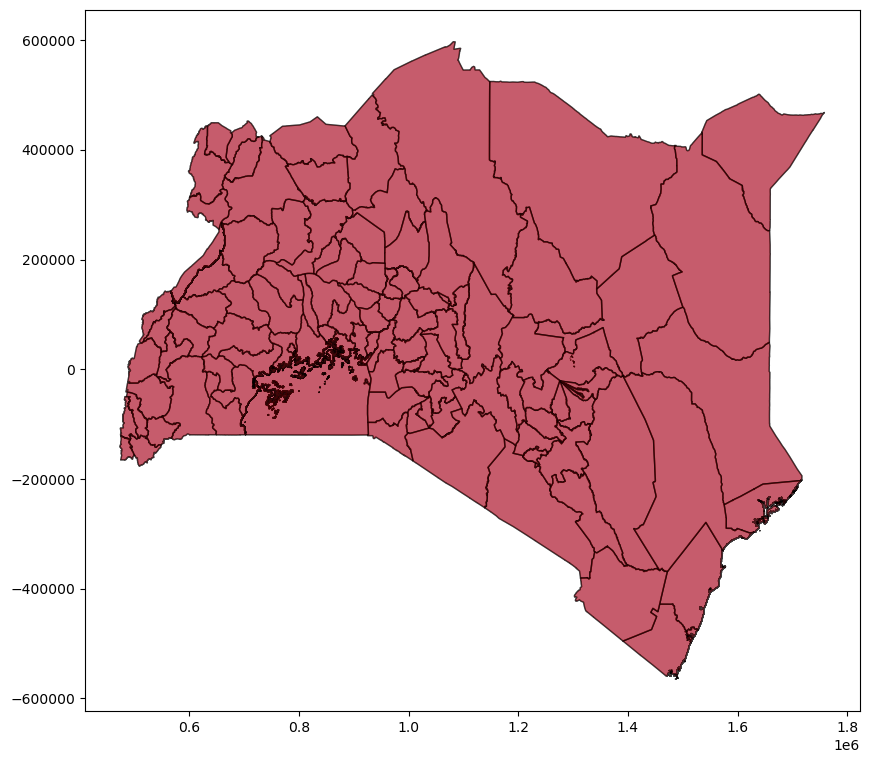

In [46]:
# plot pop_density for COL

ax = admin_divisions_af.query('GID_0 == "UGA" or GID_0 == "KEN"').plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
admin_divisions_af.query('GID_0 == "UGA" or GID_0 == "KEN"').plot(ax=ax, color='red', alpha=0.5, edgecolor='k')

<Axes: >

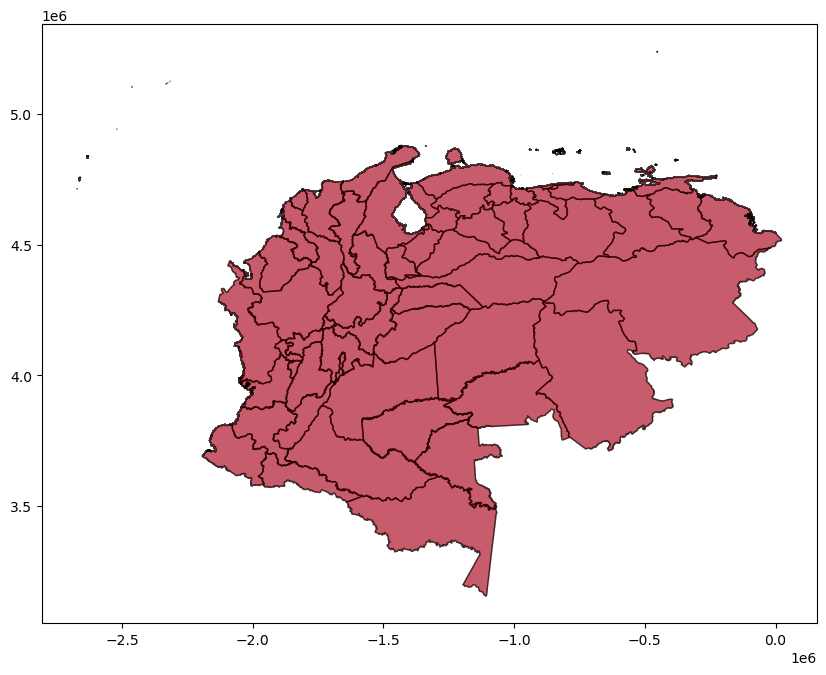

In [41]:
# plot pop_density for COL

ax = admin_divisions.query('GID_0 == "COL" or GID_0 == "VEN"').plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
admin_divisions.query('GID_0 == "COL" or GID_0 == "VEN"').plot(ax=ax, color='red', alpha=0.5, edgecolor='k')

In [18]:
# group pop_density by GID_0 and count numbrer of NAN values

pop_density.groupby('GID_0').apply(lambda x: x['population_density'].isna().sum())

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_3912/1835665339.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pop_density.groupby('GID_0').apply(lambda x: x['population_density'].isna().sum())


GID_0
ARG    10
BOL     9
BRA    26
CHL     9
COL    33
ECU    24
GUF     2
GUY    10
PER    26
PRY    18
SUR    10
URY     0
VEN    25
dtype: int64

In [20]:
pop_density[pop_density['GID_0'] == 'URY']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,area_km2,adjusted_population,population_density,geometry
199,URY.1_2,URY,Uruguay,Artigas,NA,NA,Departamento,Department,NA,UY.AR,UY-AR,12019.880771,86751.0,7.217293,"MULTIPOLYGON (((239362.634 195252.581, 239362...."
200,URY.2_2,URY,Uruguay,Canelones,NA,NA,Departamento,Department,NA,UY.CA,UY-CA,4524.641522,630249.0,139.292582,"MULTIPOLYGON (((359730.895 -343998.836, 359755..."
201,URY.3_2,URY,Uruguay,Cerro Largo,NA,NA,Departamento,Department,NA,UY.CL,UY-CL,13802.910897,86571.0,6.271938,"MULTIPOLYGON (((464717.315 -106366.391, 464665..."
202,URY.4_2,URY,Uruguay,Colonia,NA,NA,Departamento,Department,NA,UY.CO,UY-CO,6117.494752,136266.0,22.274805,"MULTIPOLYGON (((186990.182 -286907.588, 186989..."
203,URY.5_2,URY,Uruguay,Durazno,NA,NA,Departamento,Department,NA,UY.DU,UY-DU,12234.936157,64176.0,5.245307,"MULTIPOLYGON (((408245.141 -151329.165, 408135..."
204,URY.6_2,URY,Uruguay,Flores,NA,NA,Departamento,Department,NA,UY.FS,UY-FS,5139.803531,25953.0,5.049415,"MULTIPOLYGON (((257788.242 -231073.639, 257829..."
205,URY.7_2,URY,Uruguay,Florida,NA,NA,Departamento,Department,NA,UY.FD,UY-FD,10409.743417,78802.0,7.570023,"MULTIPOLYGON (((387893.510 -260707.386, 387769..."
206,URY.8_2,URY,Uruguay,Lavalleja,NA,NA,Departamento,Department,NA,UY.LA,UY-LA,10029.626445,64685.0,6.449393,"MULTIPOLYGON (((398831.057 -303494.787, 398836..."
207,URY.9_2,URY,Uruguay,Maldonado,NA,NA,Departamento,Department,NA,UY.MA,UY-MA,4805.460121,213983.0,44.529139,"MULTIPOLYGON (((442812.523 -347840.025, 443032..."
208,URY.10_2,URY,Uruguay,Montevideo,Montevidéu,NA,Departamento,Department,NA,UY.MO,UY-MO,530.705875,1378209.0,2596.935640,"MULTIPOLYGON (((338096.548 -342442.611, 338072..."


In [21]:
# Sum the total adjusted_population for each GID_0

pop_density.groupby('GID_0').apply(lambda x: x['adjusted_population'].sum())

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_3912/3266165236.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pop_density.groupby('GID_0').apply(lambda x: x['adjusted_population'].sum())


GID_0
ARG    29339329.0
BOL           0.0
BRA      227792.0
CHL     3034331.0
COL           0.0
ECU           0.0
GUF           0.0
GUY           0.0
PER           0.0
PRY           0.0
SUR           0.0
URY     3677581.0
VEN           0.0
dtype: float64

In [44]:
col_kontur.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
col_kontur.osm_admin_level.value_counts()
# col_kontur[col_kontur['admin_level'] == 4]['population'].sum()

osm_admin_level
9     1424
6     1099
8      696
10     256
5      123
7       86
4       32
3        8
2        1
1        1
Name: count, dtype: int64

<Axes: >

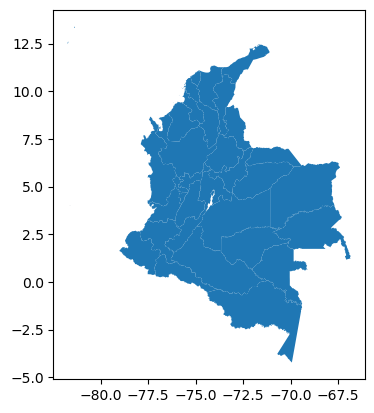

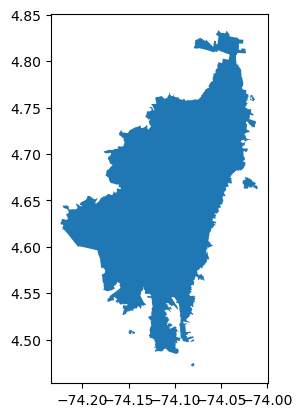

In [56]:
# col_kontur[col_kontur.admin_level==4]
col_kontur.query('admin_level == 4 | name == "Bogotá" ').plot()
col_kontur.query('name == "Bogotá" ').plot()

In [5]:

col_kontur.query('admin_level == 4 | name == "Bogotá" ')['population'].sum()

48099070.0

In [12]:
col_konturpop.population.sum()

52169654.0

<Axes: >

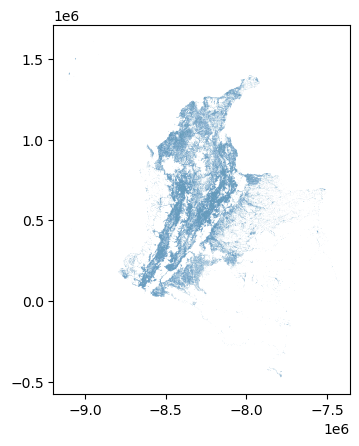

In [14]:
col_konturpop.plot()

In [8]:
col_pop_density.adjusted_population.sum()

54947176.0

In [9]:
# import "/Users/upar/Library/CloudStorage/OneDrive-Universidaddelosandes/capacidad-estatal/datos/spatial/kontur_population_CO_20231101.gpkg"


,admin_level,osm_admin_level,name,name_en,population,hasc,geometry
0,2.0,2,Colombia,Colombia,48637464.0,CO,"MULTIPOLYGON (((-79.24303 1.62142, -79.24301 1..."
1,3.0,3,RAP Caribe,None,10479890.0,None,"MULTIPOLYGON (((-76.50994 7.58393, -76.50929 7..."
2,3.0,3,RAP (Especial) Central,None,15368277.0,None,"MULTIPOLYGON (((-76.62426 1.97385, -76.61960 1..."
3,3.0,3,RAP Eje Cafetero,None,4058402.0,None,"MULTIPOLYGON (((-76.21154 5.34731, -76.20960 5..."
4,3.0,3,RAP Amazonía,None,1365471.0,None,"MULTIPOLYGON (((-77.18680 0.63099, -77.18420 0..."


In [85]:
col_kontur['osm_admin_level'].value_counts()
col_kontur[col_kontur['osm_admin_level']=='4']

,admin_level,osm_admin_level,name,name_en,population,hasc,geometry
9,4.0,4,Amazonas,Amazonas,211876.0,None,"MULTIPOLYGON (((-74.39585 -0.58106, -74.39506 ..."
10,4.0,4,Huila,None,1145280.0,None,"MULTIPOLYGON (((-76.62426 1.97385, -76.61960 1..."
11,4.0,4,Guainía,None,68576.0,None,"MULTIPOLYGON (((-70.94249 2.60666, -70.81952 2..."
12,4.0,4,Caldas,Caldas,1165324.0,None,"MULTIPOLYGON (((-75.92268 5.04196, -75.92247 5..."
13,4.0,4,Santander,None,2107811.0,None,"MULTIPOLYGON (((-74.52666 6.26406, -74.52664 6..."
14,4.0,4,Vaupés,None,61673.0,None,"MULTIPOLYGON (((-72.03294 0.66448, -72.03268 0..."
15,4.0,4,Quindío,None,561913.0,None,"MULTIPOLYGON (((-75.89580 4.42487, -75.89573 4..."
16,4.0,4,Vichada,None,68413.0,None,"MULTIPOLYGON (((-71.07780 3.35581, -71.07761 3..."
17,4.0,4,Chocó,None,512304.0,None,"MULTIPOLYGON (((-77.89346 7.22232, -77.88906 7..."
18,4.0,4,Risaralda,None,931316.0,None,"MULTIPOLYGON (((-76.21154 5.34731, -76.20960 5..."


In [87]:

admin_divisions = gpd.read_file(f"{work_dir}/codigo/01_build/03_output/gadm41_COL.gpkg", layer='ADM_ADM_1')

<Axes: >

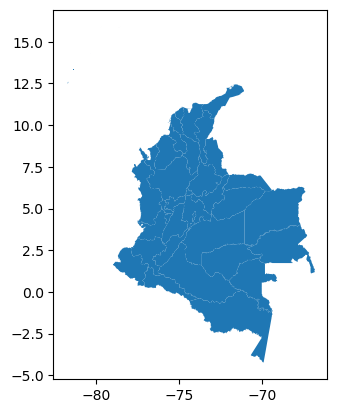

In [88]:
admin_divisions.plot()

In [91]:
admin_divisions.crs.is_projected

False

In [13]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1_data':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2_data':[1,2]})

<Axes: >

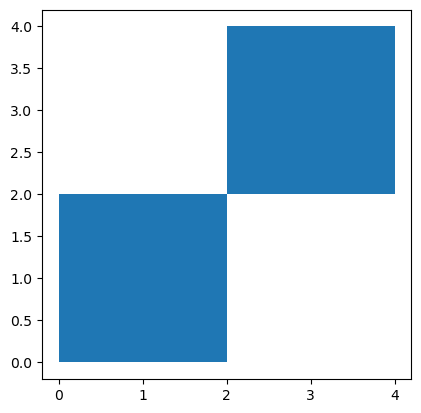

In [14]:
df1.plot()

<Axes: >

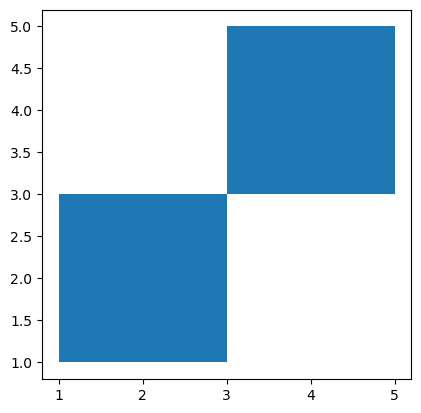

In [15]:
df2.plot()

<Axes: >

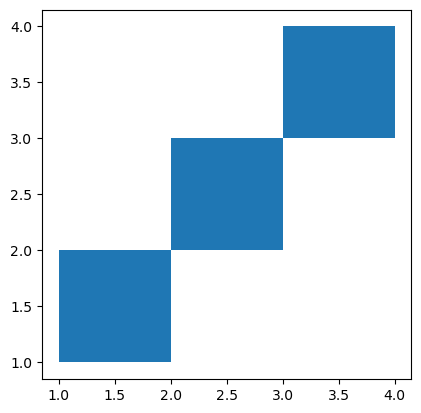

In [16]:
gpd.overlay(df1, df2, how='intersection').plot()
